## Etude des profils utilisateur

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import nltk
import re
import warnings

from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [2]:
warnings.filterwarnings('ignore')

In [3]:
users_output_df = pd.read_csv('../../../Data/appdata/rotten/users_sentiment_output.csv', index_col=0)
users_output_df.head(5)

,movieID,userID,target,sentiment_label,sentiment_score
0,m/0814255,u/Andrew_L._Urban,A fantasy adventure that fuses Greek mythology...,POSITIVE,0.999749
1,m/0814255,u/Louise_Keller,"Uma Thurman as Medusa, the gorgon with a coiff...",POSITIVE,0.999734
2,m/0814255,u/nan,With a top-notch cast and dazzling special eff...,POSITIVE,0.999808
3,m/0814255,u/Ben_McEachen,Whether audiences will get behind The Lightnin...,POSITIVE,0.917088
4,m/0814255,u/Ethan_Alter,What's really lacking in The Lightning Thief i...,POSITIVE,0.735963


In [4]:
users_target_df = users_output_df[['userID', 'target', 'sentiment_label']]
users_target_df.dropna(inplace=True)
occurrences = users_target_df['userID'].value_counts()
mask = users_target_df['userID'].isin(occurrences[occurrences >= 30].index)
users_target_df = users_target_df[mask]
users_target_df.head(5)

,userID,target,sentiment_label
0,u/Andrew_L._Urban,A fantasy adventure that fuses Greek mythology...,POSITIVE
1,u/Louise_Keller,"Uma Thurman as Medusa, the gorgon with a coiff...",POSITIVE
2,u/nan,With a top-notch cast and dazzling special eff...,POSITIVE
4,u/Ethan_Alter,What's really lacking in The Lightning Thief i...,POSITIVE
5,u/David_Germain,It's more a list of ingredients than a movie-m...,POSITIVE


In [5]:
users_target_df.isna().sum()

userID             0
target             0
sentiment_label    0
dtype: int64

### Etude des corpus des utilisateurs

In [6]:
users_corpus_dict = (
    users_target_df 
    .groupby("userID")["target"]
    .apply(set)
    .to_dict()
)

In [7]:
list(users_corpus_dict['u/Ethan_Alter'])[:10]

["It's mostly harmless, but also pretty lifeless.",
 'Simply not worth the effort or expense of a family night out at the movies.',
 'Despite some compelling moments, this one-sided portrait of former boxing superstar Mike Tyson feels like a missed opportunity.',
 'Compared to the wackadoo ramblings of The Happening or the stark-raving silliness of Lady in the Water, this film is a more generic failure.',
 'Obsessed is best enjoyed as glossy, campy fantasy',
 'The Debt has one of the worst endings to an otherwise well-crafted thriller in recent memory.',
 'The film has a certain easygoing charm, choppiness notwithstanding, and delivers several big laughs.',
 'The movie toggles unconvincingly between grounded emotions and sitcom shtick.',
 'Using the Holocaust as the basis for a horror movie is pretty distasteful, but what offended me the most about The Unborn is how sloppy it is.',
 'A Hijacking accomplishes a tricky task, generating tension through talk rather than action.']

In [8]:
users_corpus_pos_dict = (
    users_target_df[users_target_df['sentiment_label'] == 'POSITIVE']
    .groupby("userID")["target"]
    .apply(set)
    .to_dict()
)

In [9]:
list(users_corpus_pos_dict['u/Ethan_Alter'])[:10]

["It's not a film I have a lot of affection for and it's not one I'm eager to see again, but I appreciate the skill with which the movie was made.",
 'Changeling succeeds as both a compelling mystery and a period piece that still feels relevant today.',
 "It is indeed filled with lots of ninjas who are constantly at each other's throats with all manner of sharp implements.",
 '[A] gorgeous, moving, messy and utterly unique visual poem.',
 "J-horror thrives on atmosphere and that's one of the many things missing from Shutter, along with tension, wit and, you know, scares",
 'Those wacky Coen Brothers revisit their childhoods to craft their most personal--and one of their very best--films to date.',
 'Obsessed is best enjoyed as glossy, campy fantasy',
 "Despite its flaws, at least The Express does its best to honor this groundbreaking player's memory.",
 "Delightfully witty and surprisingly thoughtful, Wes Anderson's animated adaptation of the Roald Dahl novel is, in a word, fantastic."

In [10]:
users_corpus_neg_dict = (
    users_target_df[users_target_df['sentiment_label'] != 'POSITIVE']
    .groupby("userID")["target"]
    .apply(set)
    .to_dict()
)

In [11]:
list(users_corpus_neg_dict['u/Ethan_Alter'])[:10]

["A relentlessly paced but almost comically nonsensical big-screen version of a TV series that's remembered more for its nostalgic value than its actual quality.",
 "Tim Burton's muddled take on the classic Lewis Carroll tale has moments of lucidity but mostly seems as confused as its titular heroine.",
 'Simply not worth the effort or expense of a family night out at the movies.',
 "It's mostly harmless, but also pretty lifeless.",
 'Despite some compelling moments, this one-sided portrait of former boxing superstar Mike Tyson feels like a missed opportunity.',
 'Compared to the wackadoo ramblings of The Happening or the stark-raving silliness of Lady in the Water, this film is a more generic failure.',
 "There's nary a laugh to be found in this relentlessly idiotic parody of popular romantic comedies, which manages the difficult feat of seeming overlong at just 80 minutes.",
 "One could argue that you shouldn't expect a teen comedy to offer a nuanced depiction of the role of educatio

#### WordCloud

In [12]:
punctuation = r"[\!\"\#\$\%\&\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@\[\\\]\^\_\`\{\|\}\~\n\t]"

In [13]:
def word_cloud_from_users(users):
    for u in users:
        corpus_u = ' '.join(users_corpus_dict[u])
        corpus_u = re.sub('( )+', ' ', re.sub(punctuation, " ", corpus_u))
        wordcloud = WordCloud(background_color='white', stopwords = STOPWORDS, max_words=100).generate(corpus_u) 
        plt.figure()
        plt.title(' '.join(u[2:].split('_')))
        plt.imshow(wordcloud)
        plt.axis("off")

In [14]:
users_list = list(users_corpus_dict.keys())

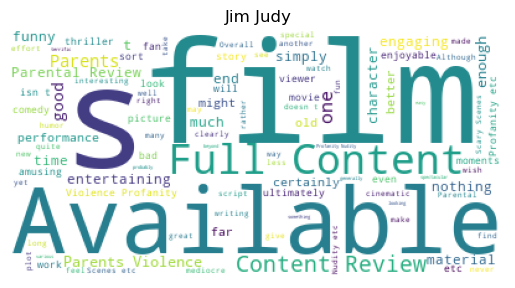

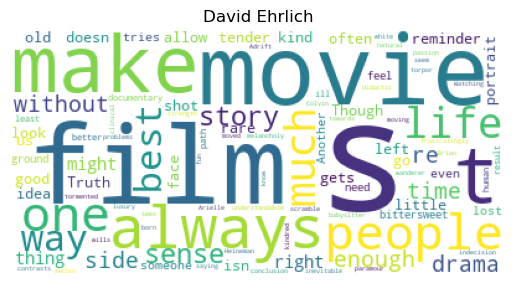

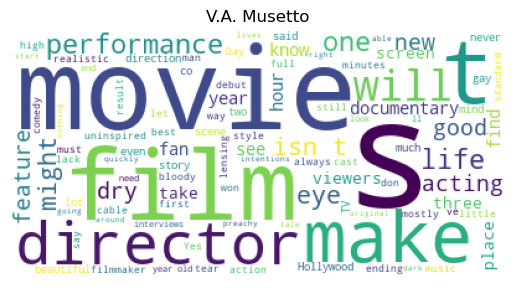

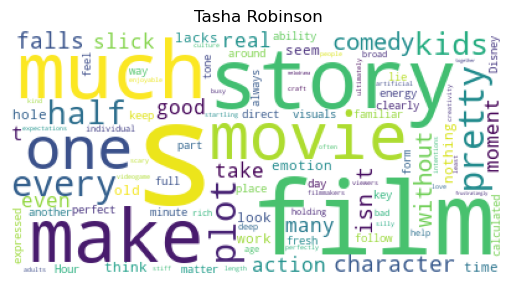

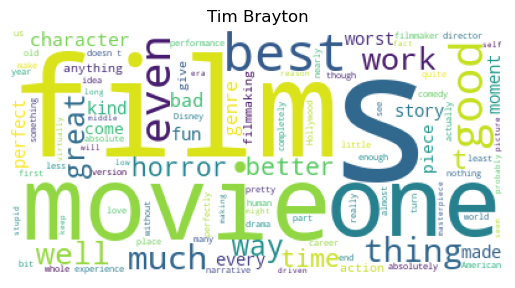

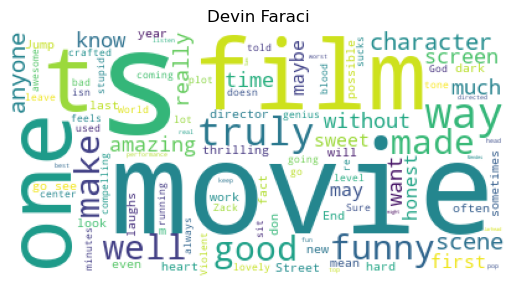

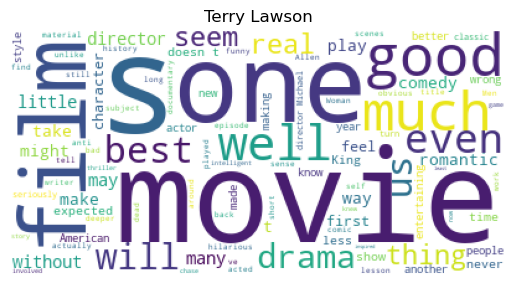

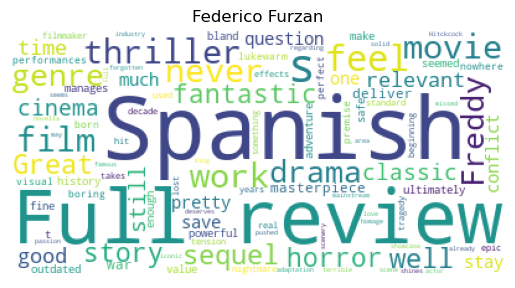

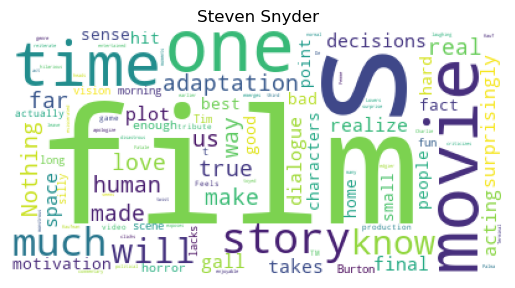

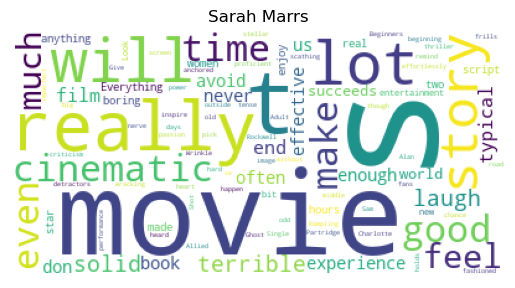

In [19]:
random_users = np.random.choice(users_list, 10)
word_cloud_from_users(random_users)

In [16]:
def word_cloud_polarized_from_users(users):
    for u in users:
        pos = True
        neg = True
        
        corpus_pos_u = ' '.join(users_corpus_pos_dict.get(u, []))
        if corpus_pos_u.strip() == '': 
            pos = False
        else:
            corpus_pos_u = re.sub('( )+', ' ', re.sub(punctuation, " ", corpus_pos_u))
            wordcloud_pos = (WordCloud(background_color='white', stopwords = STOPWORDS, max_words=100)
            .generate(corpus_pos_u))
        
        corpus_neg_u = ' '.join(users_corpus_neg_dict.get(u, []))
        if corpus_neg_u.strip() == '': 
            neg = False
        else:
            corpus_neg_u = re.sub('( )+', ' ', re.sub(punctuation, " ", corpus_neg_u))
            wordcloud_neg = (WordCloud(background_color='white', stopwords = STOPWORDS, max_words=100)
            .generate(corpus_neg_u))
        
        fig, axis = plt.subplots(ncols=2)
        plt.suptitle(' '.join(u[2:].split('_')))
        
        if pos:
            axis[0].imshow(wordcloud_pos)
            axis[0].set_title('POS')
        axis[0].axis("off")

        if neg:
            axis[1].imshow(wordcloud_neg)
            axis[1].set_title('NEG')
        axis[1].axis("off")
            
        plt.show()

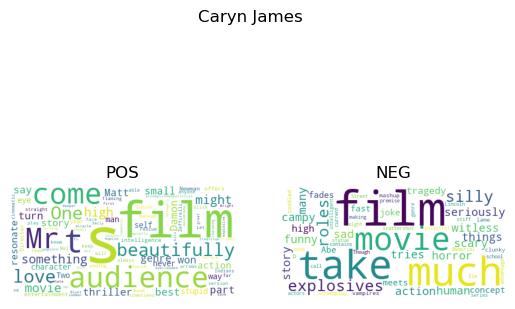

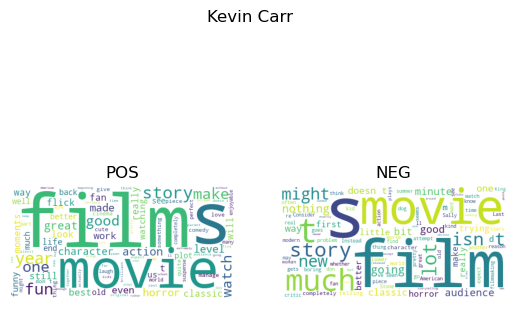

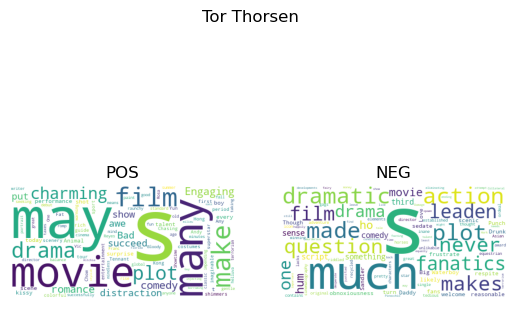

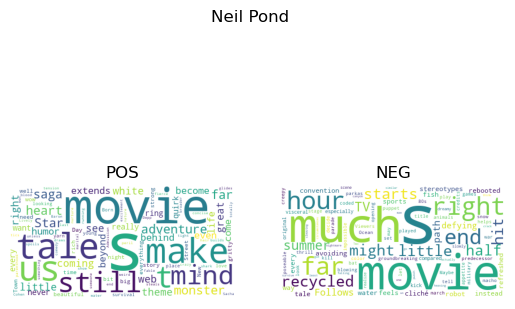

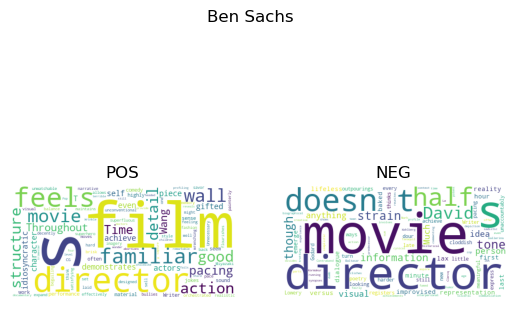

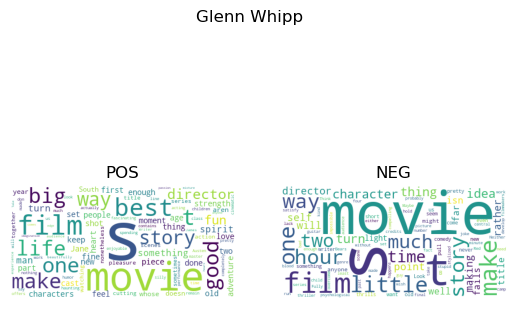

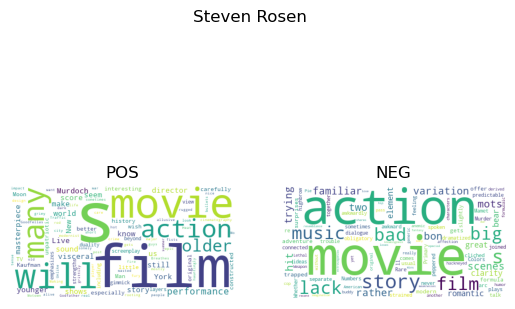

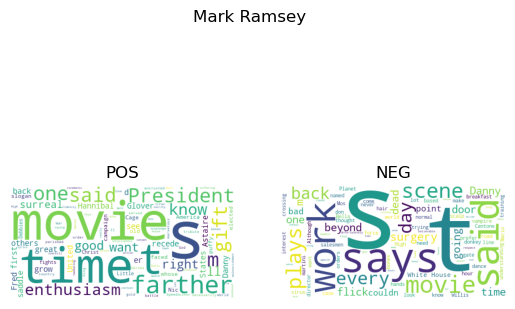

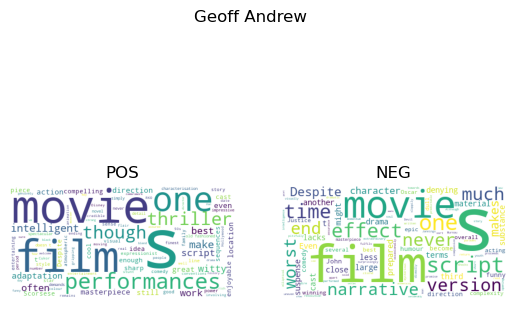

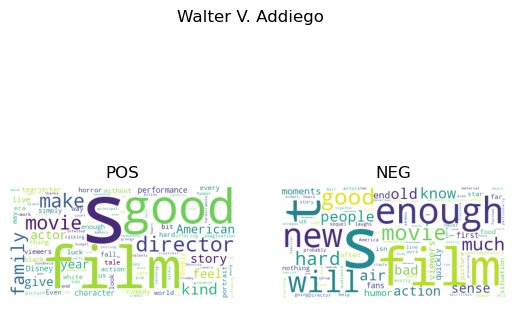

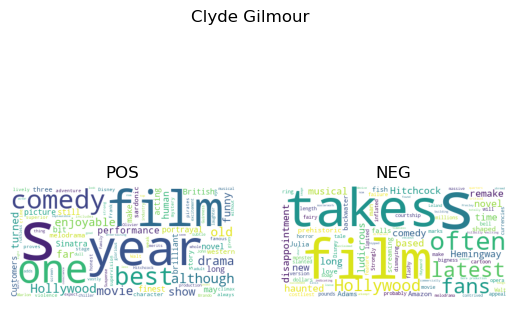

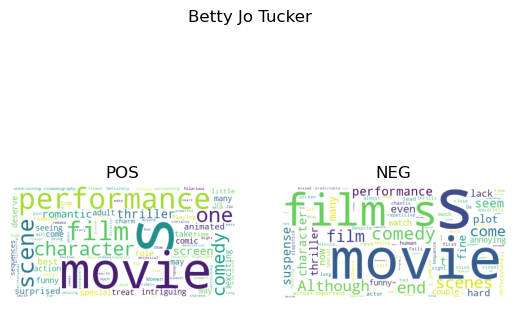

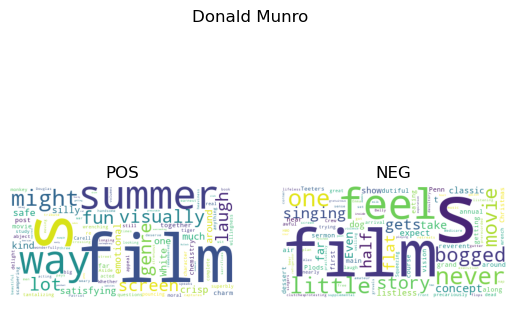

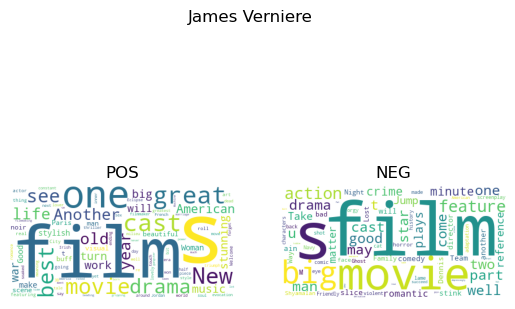

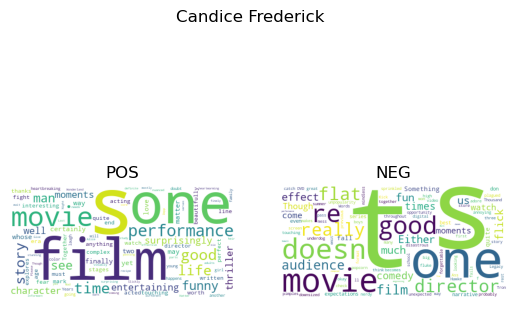

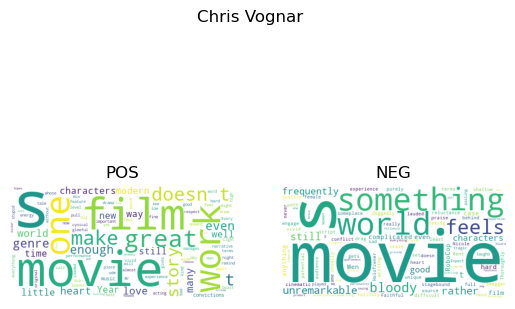

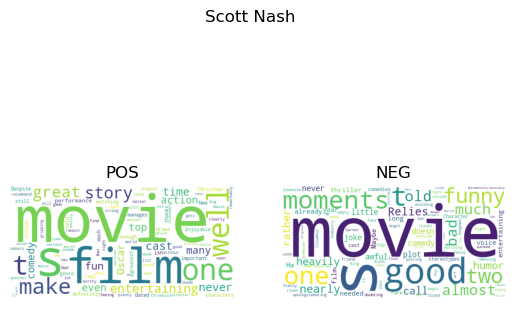

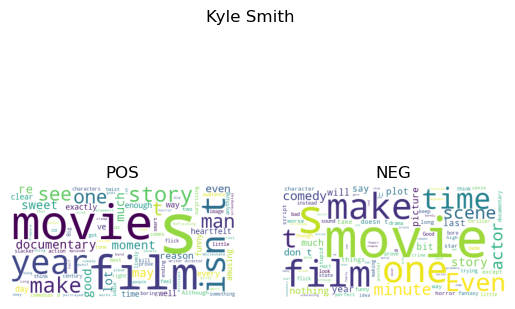

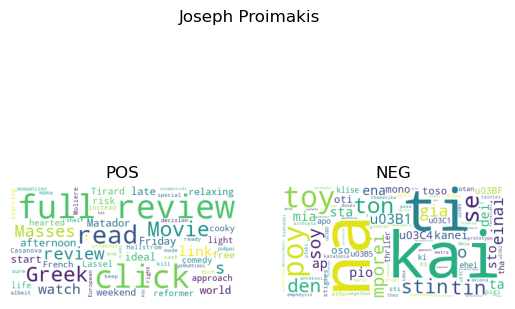

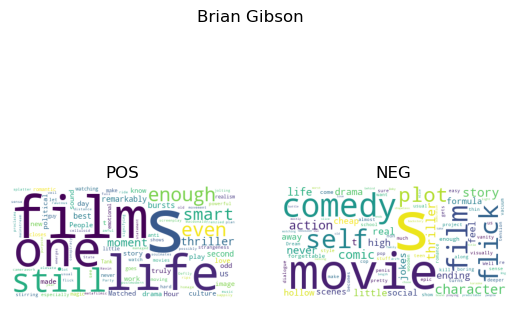

In [20]:
pos_users = set(users_corpus_pos_dict.keys())
neg_users = set(users_corpus_neg_dict.keys())
users = list(pos_users.intersection(neg_users))
random_users = np.random.choice(users, 20)
word_cloud_polarized_from_users(random_users)

#### Clustering